In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,7)

## Problem 1

### Part A

Here is the distribution of temperature points on a log scale, including the additional 'bad data points'

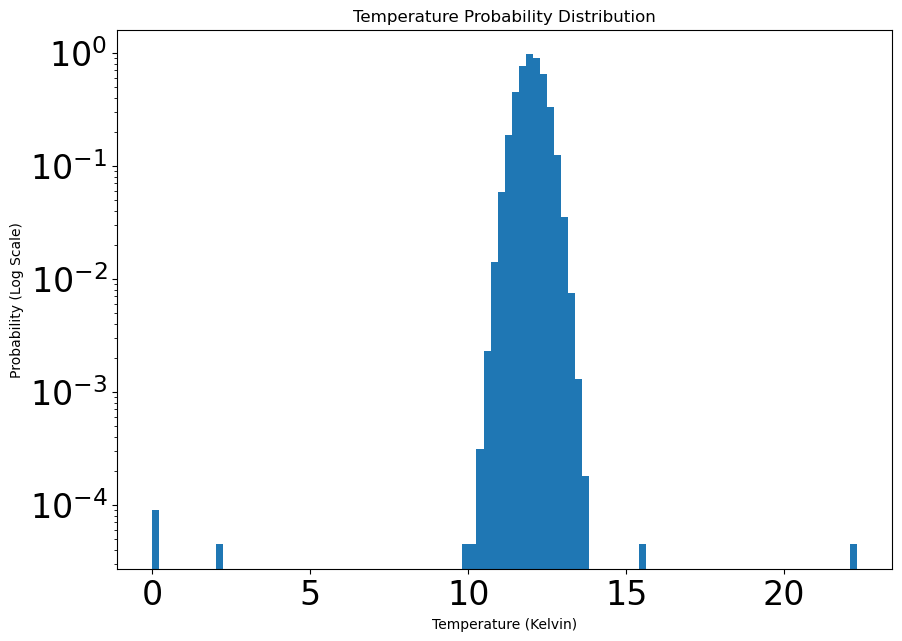

In [2]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Probability (Log Scale)')
plt.title('Temperature Probability Distribution')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

#### 1. Start by exploring the data you have created with appropriate plots

To visualize the good data points and the bad data points, I will start by graphing the two sets of data separately. By doing this we will be able to later analyze how our method for ommitting bad data works well and does not work well based on the position of the bad data points relative to the good data .

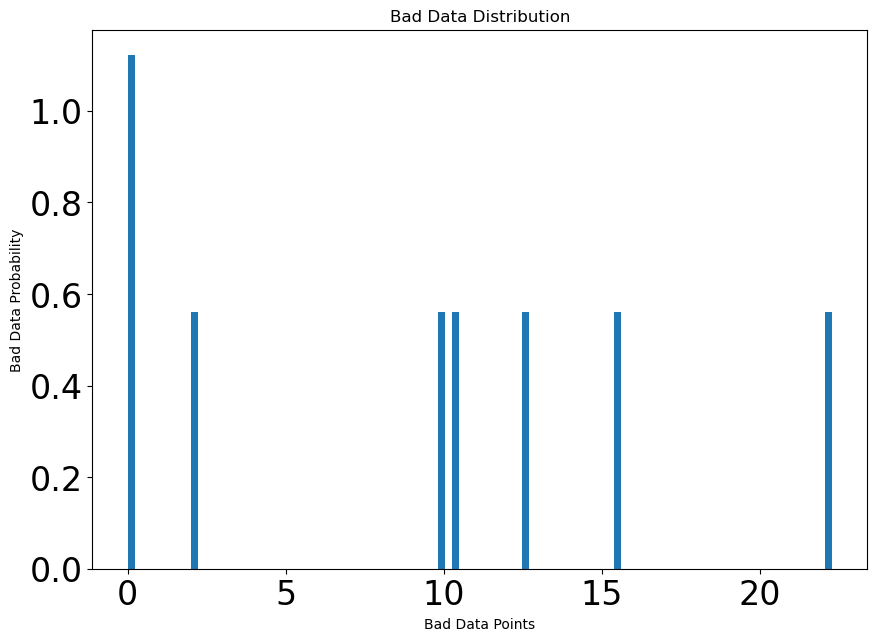

In [3]:
# Explore data with plots
d_out = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
fig, ax = plt.subplots(1, 1)
ax.hist(d_out,100, density=True)
plt.tick_params(labelsize = 24)
#plt.yscale('log')
plt.ylabel('Bad Data Probability')
plt.xlabel('Bad Data Points')
plt.title('Bad Data Distribution')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

This next graph shows the simulated 'good data' on a linear scale. With this x axis scale we can see where the bad data points are relative to the good data distribution. 

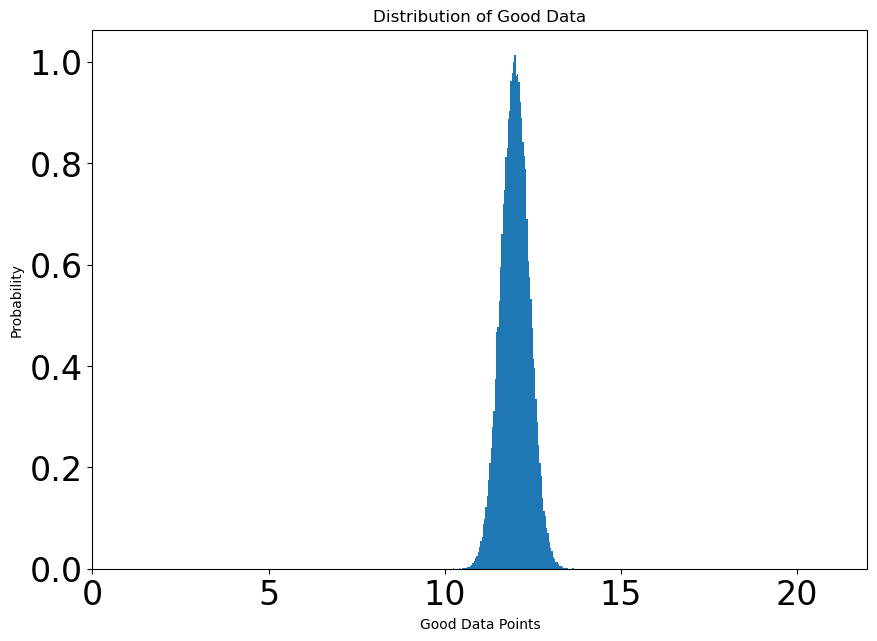

In [4]:
d_pdf = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d_pdf,100, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0, 22])
plt.xlabel('Good Data Points')
plt.ylabel('Probability')
plt.title('Distribution of Good Data')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

Clearly a majority of the bad data is separate from the good data, but there are a few points that do overlap.

#### 2. State the statistical question: 

What's the probability of finding a value that is more than |5| sigma away from the mean of the distribution? This will allow us to try to filter out the data that was measured when the thermal control system was not working. We must find values that are on both sides of the mean because the bad data can be on either side of the distribtion.

$ \int_{-\infty}^d \frac{1}{\sqrt{2\pi\sigma}} e^-\frac{(x-\mu)^2}{2\sigma^2}$

In order to find the values that have a sigma value of either greater than 5 or less than -5 we must find the probability of each temperature value in the distribtion, then convert that probability into its corresponding sigma. In this case our probability density function is a Gaussian with $\mu = 12$ and $\sigma = .4$

#### 3. Apply statistical test and construct truth table

In [12]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
err = []
copy_dist = []
for i in range(len(d)):
    probability = stats.norm.cdf(d[i], loc = 12, scale = 0.4)
    sigma = stats.norm.ppf(probability)
    
    if sigma > 5 or sigma < -5:
        err.append(d[i])
    else:
        copy_dist.append(d[i])
        
print(err)

[10.0, 2.1, 0.0, 0.0, 15.6, 22.3]


(0.0, 23.0)

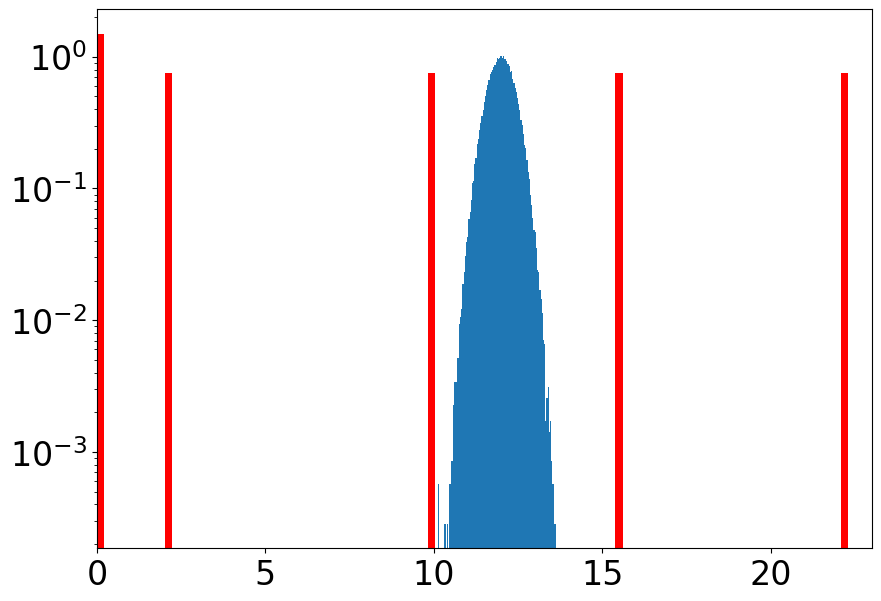

In [13]:
fig, ax = plt.subplots(1, 1)
ax.hist(copy_dist,100, density=True)
ax.hist(err, 100, density=True, color = 'red')
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,23])

<table>
  <thead>
    <tr>
      <th> </th>
      <th>True Outlier</th>
      <th>True Data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Outlier</th>
      <td>6</td>
      <td>0</td>
    </tr>
    <tr>
      <th>Good Data</th>  
      <td>2</td>
      <td>100000</td>
    </tr>
  </tbody>
</table>

### Part B

How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

Our threshold value for the outliers was 5 sigma. This value corresponds to a pretty significant probability (1/35million) but our function did not ommit all the added in data points, only the ones that were significantly far from the mean. If we choose our sigma value to be 4 instead of 5, the amount of detected bad data points doubles. 

### Part C

Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

There are added data points of outltiers that are not being thrown out, but as we decrease our sigma value threshold it would include more of the added data points. These points are not avoidable if we want to keep the good data. For instance, one of the added values was at 12.7, but the mean was at 12, so we would have to decrease our threshold to an unreasonable sigma value, meaning we would have to cut out a lot of good data to get rid of the one bad data point. 

## Problem 2

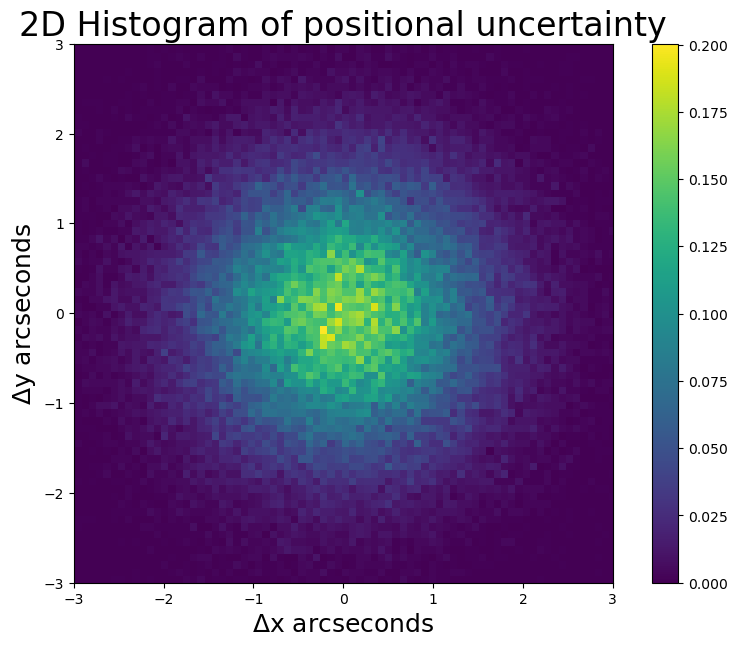

In [7]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### 1. What is the question in words?

What is the expected acrsecond distance that corresponds to a signal of 5 sigma or greater? 

#### 2. What is the question in math?

The distribution of vector amplitude of a 2D Gaussian corresponds to a Rayleigh distribution, so our probability and sigmas will be calculated with this pdf.

$5\sigma$ Probability = $3*10^{-7}$

$ Probability = \int_{5\sigma}^\infty \frac{x}{\sigma^2}e^\frac{-x^2}{2\sigma^2}$dx

What magnitude of arcseconds corresponds to a $5\sigma$ probability?

#### 3. What distance in arcseconds represents a 5 sigma detection of motion?

In [15]:
probability = stats.norm.cdf(5)
sigma = stats.rayleigh.ppf(probability)

print(f'In order to get a 5 sigma detection we would need a distance of {sigma:.2f}')

In order to get a 5 sigma detection we would need a distance of 5.49


## Problem 3

#### 1. What is the question in words?

What is the probability that the background produced a signal as signal like as 6800 cosmic rays? 

#### 2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.

This problem deals with a Poisson distribution of cosmic rays with an expected value of 1 ray per minute. The mean of the distribution if we look at a range of time can be calculated by the fact we are looking at a period of 8 hours a day for 15 days, giving us an expected rate of 7200 cosmic rays during this period. 

Probability = $\int_0^{6800}\frac{\lambda^x}{x!}e^{-\lambda}dx $ where $ \lambda = 7200$

#### 3. Convert to sigma.

In [18]:
probability = 1 - stats.poisson.cdf(6800, 7200, 0)
sigma = stats.norm.ppf(probability)

print(f'If we see 6800 cosmic rays the significance of our moon shadow detection is {sigma:.2f}')

If we see 6800 cosmic rays the significance of our moon shadow detection is 4.75
